In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as sco
from datetime import datetime, timedelta
import yfinance as yf
import yfmodulenew as mod
import datetime

In [2]:
mill = 10**6

In [9]:
stocks = pd.read_csv("bci_des22.csv")['bci'].values.tolist()

FileNotFoundError: [Errno 2] No such file or directory: 'bci_des22.csv'

In [8]:
start_date = "2021-03-05"
end_date = "2024-03-04"
index = mod.stockrets('^JKSE', start_date, end_date).to_frame()
mod.performance(index)

[*********************100%***********************]  1 of 1 completed


C:\Users\bryan\OneDrive\My Folder\yfmodulenew.py:90: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  return performance.transpose().style.set_precision(4)


,^JKSE
Mean Return,0.0537
St. Dev.,0.1165
RR Ratio,0.4609
% Positive,0.5274
Worst Day,-0.0452
Best Day,0.0222
Max DrawDown,-0.1085


In [12]:
stocks = ["BBCA.JK", "BMRI.JK", "PTBA.JK", "PGAS.JK", "NVDA", "GOTO.JK", "ERAA.JK", "PYPL"]

In [21]:
start_date = "2018-03-05"
end_date = "2024-03-04"

port_des22 = mod.stockrets(ticker=stocks, start=start_date, end=end_date)

[*********************100%***********************]  8 of 8 completed


In [22]:
port_des22

,BBCA.JK,BMRI.JK,PTBA.JK,PGAS.JK,NVDA,GOTO.JK,ERAA.JK,PYPL
,,,,,,,,
Date,,,,,,,,
2018-03-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-03-06,-0.004381,-0.021506,0.008163,0.000000,0.027251,-0.011606,-0.013030,0.002022
2018-03-07,-0.007714,-0.015650,-0.071610,0.000000,-0.001323,-0.043745,-0.040139,0.003653
2018-03-08,0.030503,0.021842,0.013015,0.000000,-0.002733,-0.012270,-0.045383,0.004392
2018-03-09,0.000000,0.000000,0.078715,0.000000,0.017061,-0.016598,0.031637,0.010462
...,...,...,...,...,...,...,...,...
2024-02-26,-0.002548,0.000000,0.000000,-0.012739,0.003483,-0.021787,-0.019194,0.002869
2024-02-27,0.007624,0.003540,0.004211,0.025318,-0.004956,-0.008850,0.003868,0.013893


In [23]:
start_date_port = port_des22.index[0]
start_date_port

Timestamp('2018-03-05 00:00:00')

In [24]:
index = mod.stockrets('^JKSE', start_date_port, end_date).to_frame()

[*********************100%***********************]  1 of 1 completed


In [28]:
rf = 0.07
port_des22_w = mod.weight_opt(port_des22, rf, max_allocation=0.3)
w_value = port_des22_w[port_des22_w>0]

In [29]:
port_des22_w

BBCA.JK      0.3000
BMRI.JK      0.2349
PTBA.JK      0.0798
PGAS.JK      0.0000
NVDA         0.3000
GOTO.JK      0.0000
ERAA.JK      0.0853
PYPL         0.0000
dtype: float64

<AxesSubplot:>

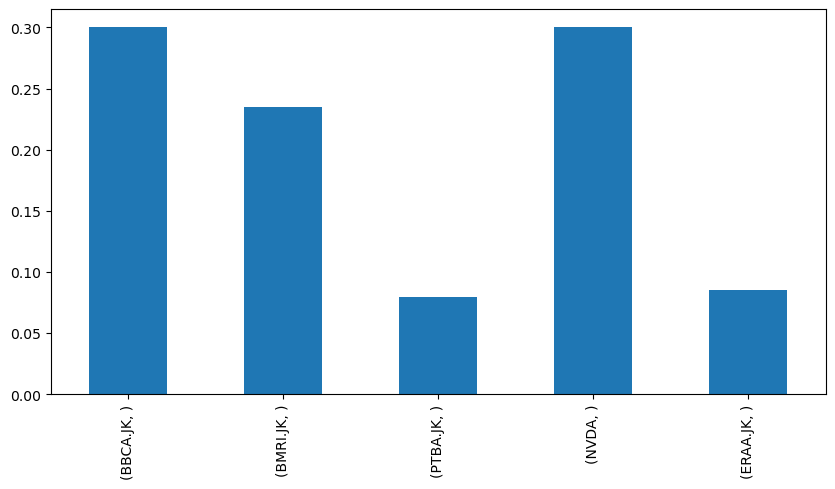

In [30]:
w_value.plot.bar(figsize=(10,5))

In [31]:
a = w_value*100*mill
a.sum()

100000000.0

In [32]:
a.map("{:,.0f}".format)

BBCA.JK      30,000,000
BMRI.JK      23,490,000
PTBA.JK       7,980,000
NVDA         30,000,000
ERAA.JK       8,530,000
dtype: object

In [33]:
port_des22_opt = mod.port_opt(port_des22, port_des22_w)
port_des22_perf = mod.performance(port_des22_opt)
port_des22_perf.data["Optimized"]

C:\Users\bryan\OneDrive\My Folder\yfmodulenew.py:90: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  return performance.transpose().style.set_precision(4)


Mean Return     0.180091
St. Dev.        0.219660
RR Ratio        0.819861
% Positive      0.512870
Worst Day      -0.087049
Best Day        0.070458
Max DrawDown   -0.466188
Name: Optimized, dtype: float64

In [34]:
vs_index = index.join(port_des22_opt['Optimized'])

<AxesSubplot:title={'center':'Stocks Performance over the Years'}, xlabel='Date', ylabel='Value'>

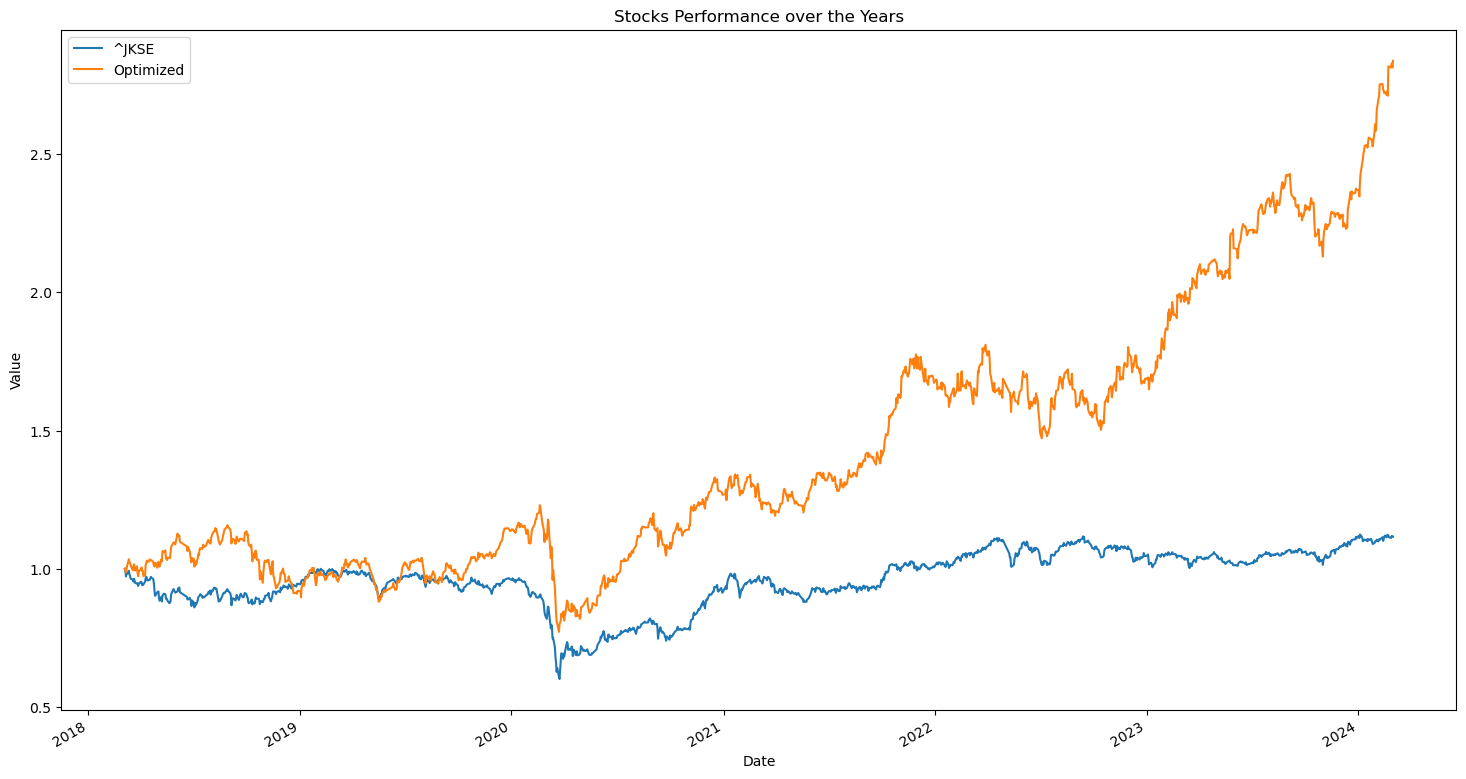

In [35]:
port_des22_plt = mod.port_plot(vs_index)
port_des22_plt

In [36]:
test_start = "2023-05-01"
test_end = "2023-05-20"

port_test = mod.stockrets(ticker=stocks, start=test_start, end=test_end)
port_test['Backtest'] = (port_test*port_des22_w).sum(axis=1)
port_test_perf = mod.performance(port_test)
port_test_perf.data['Backtest']

[*********************100%***********************]  8 of 8 completed


C:\Users\bryan\OneDrive\My Folder\yfmodulenew.py:90: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  return performance.transpose().style.set_precision(4)


Mean Return    -0.147465
St. Dev.        0.134557
RR Ratio       -1.095934
% Positive      0.400000
Worst Day      -0.016182
Best Day        0.014553
Max DrawDown         NaN
Name: Backtest, dtype: float64

In [15]:
test_index = mod.stockrets('^JKSE', test_start, test_end).to_frame()
vs_test = test_index.join(port_test[w_value.index]).join(port_test['Backtest'])

[*********************100%***********************]  1 of 1 completed


C:\Users\bryan\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Stocks Performance over the Years'}, xlabel='Date', ylabel='Value'>

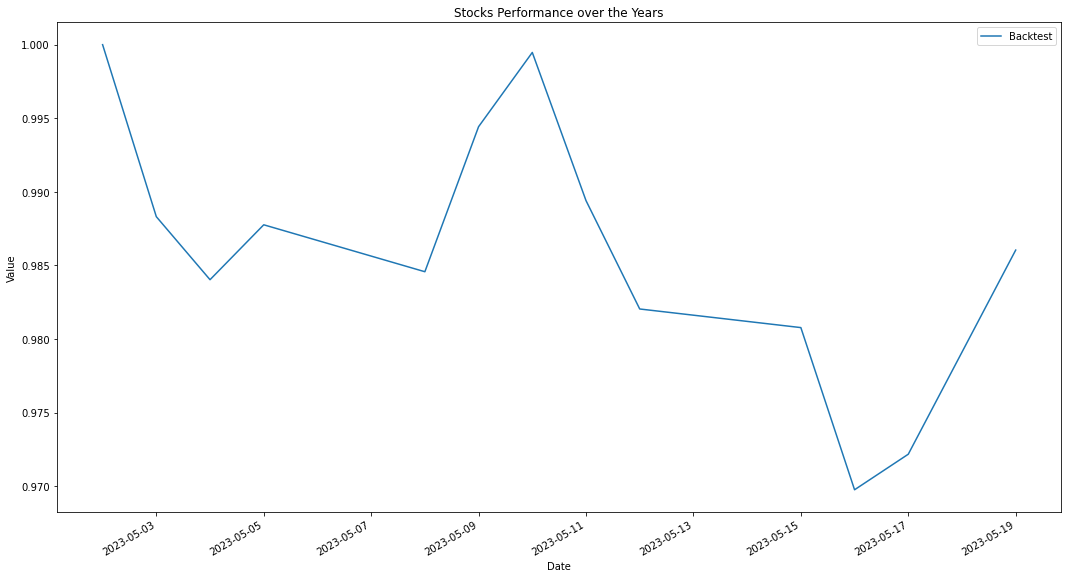

In [17]:
mod.port_plot(vs_test['Backtest'])

---- **This is the end** ----

In [5]:
stock_verse = ["ADRO.JK", "PTBA.JK", "ITMG.JK", "BRMS.JK", 
               "BBCA.JK", "BBRI.JK", "BBNI.JK", "BMRI.JK"]
start_date = "2019-01-01"
end_date = "2023-01-01"

port1 = mod.stockrets(ticker=stock_verse, start=start_date, end=end_date)
port1

[*********************100%***********************]  8 of 8 completed


,ADRO.JK,PTBA.JK,ITMG.JK,BRMS.JK,BBCA.JK,BBRI.JK,BBNI.JK,BMRI.JK
,,,,,,,,
Date,,,,,,,,
2019-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.008197,0.007663,-0.008559,-0.013755,-0.006803,0.000000,-0.008680,-0.014052
2019-01-03,0.004073,-0.011516,0.000000,0.002766,-0.020690,0.000000,-0.008755,-0.019048
2019-01-04,0.122290,0.004815,0.000000,0.010989,0.037611,0.000000,0.080816,0.051534
2019-01-07,0.000000,0.007656,0.017046,0.000000,-0.003361,0.019803,-0.034181,0.004556
...,...,...,...,...,...,...,...,...
2022-12-26,-0.002628,0.008785,0.000000,0.010194,0.012516,0.029853,-0.010465,-0.010753
2022-12-27,-0.013245,0.002911,-0.002685,-0.012245,-0.010000,0.011696,-0.003720,-0.002706


<AxesSubplot:>

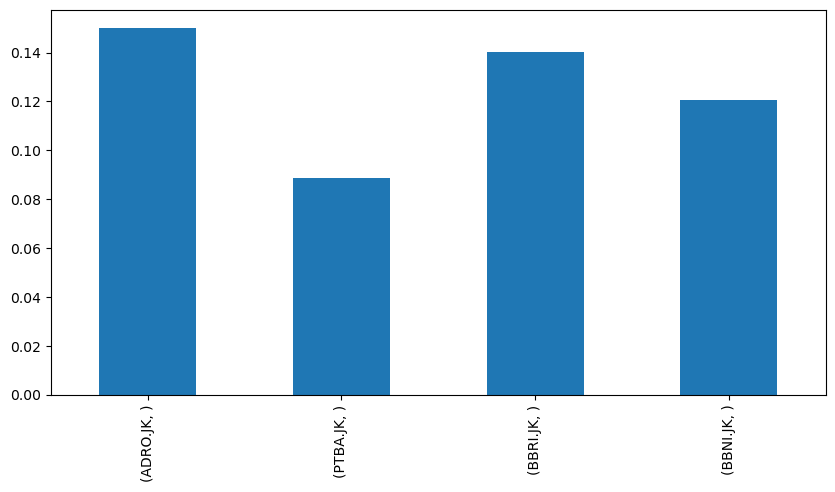

In [6]:
rf = 0.07
port1_w = mod.weight_opt(port1, rf, max_allocation=0.3, pct_equity=0.5)
port1_w = port1_w.replace(0, np.nan).dropna()
port1_w.plot.bar(figsize=(10,5))

In [7]:
port1_opt = mod.port_opt(port1, port1_w)
port1_perf = mod.performance(port1_opt)
port1_perf.data["Optimized"]

C:\Users\bryan\OneDrive\My Folder\yfmodulenew.py:90: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  return performance.transpose().style.set_precision(4)


Mean Return     0.145207
St. Dev.        0.150731
RR Ratio        0.963351
% Positive      0.484391
Worst Day      -0.037512
Best Day        0.050152
Max DrawDown   -0.270953
Name: Optimized, dtype: float64

In [16]:
port1_perf

Attributes,ADRO.JK,PTBA.JK,ITMG.JK,BRMS.JK,BBCA.JK,BBRI.JK,BBNI.JK,BMRI.JK,Optimized
Symbols,,,,,,,,,
Mean Return,0.5760,0.0018,0.4835,0.3584,0.0851,-0.0265,0.0664,0.1139,0.4016
St. Dev.,0.4172,0.3493,0.4578,0.6448,0.2300,0.3158,0.3189,0.2883,0.2908
RR Ratio,1.3807,0.0051,1.0561,0.5559,0.3701,-0.0839,0.2082,0.3953,1.3809
% Positive,0.4553,0.4187,0.4756,0.3821,0.4187,0.4228,0.4146,0.4512,0.5407
Worst Day,-0.0723,-0.0580,-0.0724,-0.0759,-0.0408,-0.0953,-0.0609,-0.0698,-0.0483
Best Day,0.1418,0.0719,0.1489,0.2420,0.0619,0.0575,0.0656,0.0668,0.0712
Max DrawDown,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
start = (datetime.today() - timedelta(365*3)).strftime('%Y-%m-%d')
end = datetime.today().strftime('%Y-%m-%d')

mod.beta_adj("ADRO.JK", "^JKSE", start, end)

1.4051810443603392

Inputs:
- start date
- end date
- risk-free rate
- equity allocation percentage
- securities in the portfolio

Process:
- stockret()
- performance()
- weight_opt()
- port_opt()

Output:
- Optimised performance of the portfolio

In [3]:
(datetime.today() - timedelta(365*3)).strftime('%Y-%m-%d')

'2019-06-20'

In [4]:
#n = 10
#start_date = (datetime.today() - timedelta(365*n)).strftime('%Y-%m-%d')
#end_date = datetime.today().strftime('%Y-%m-%d')

In [12]:
start_date = "2022-01-28"
end_date = "2022-03-31"
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'TOWR.JK']

port = mod.stockrets(stocks, start_date, end_date)
port.cumsum().apply(np.exp).tail(1)

Attributes,BBCA.JK,BBRI.JK,TOWR.JK
Symbols,,,
Date,,,
2022-03-31,1.025723,1.125604,1.038835


In [6]:
n = 10
start_date = (datetime.today() - timedelta(365*n)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
          'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
          'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
          'TOWR.JK']

port = mod.stockrets(stocks, start_date, end_date)
port_w = mod.weight_opt(port, rf)
port_opt = mod.port_opt(port, port_w)

In [7]:
port_w*0.3

Attributes  Symbols
BBCA.JK                0.19590
BBRI.JK                0.00000
BBNI.JK                0.01611
BMRI.JK                0.00000
BBTN.JK                0.00000
CPIN.JK                0.00000
ERAA.JK                0.00000
EXCL.JK                0.00000
ICBP.JK                0.02748
JPFA.JK                0.00000
TBIG.JK                0.05556
TLKM.JK                0.00000
TOWR.JK                0.00495
dtype: float64

In [8]:
mod.performance(port_opt)

Attributes,BBCA.JK,BBRI.JK,BBNI.JK,BMRI.JK,BBTN.JK,CPIN.JK,ERAA.JK,EXCL.JK,ICBP.JK,JPFA.JK,TBIG.JK,TLKM.JK,TOWR.JK,Optimized
Symbols,,,,,,,,,,,,,,
Mean Return,0.1799,0.1580,0.1796,0.1132,0.0336,0.0575,0.0524,-0.0868,0.1331,0.0645,0.1751,0.1232,0.1288,0.1738
St. Dev.,0.2485,0.3338,0.4672,0.3309,0.3978,0.4524,0.5309,0.4419,0.2928,0.4663,0.3920,0.2910,1.0878,0.2156
RR Ratio,0.7238,0.4732,0.3844,0.3420,0.0845,0.1271,0.0987,-0.1963,0.4547,0.1382,0.4466,0.4232,0.1184,0.8065
% Positive,0.4565,0.4586,0.4048,0.4488,0.4242,0.4553,0.4011,0.4084,0.4270,0.4137,0.4177,0.4460,0.3134,0.5038
Worst Day,-0.0824,-0.0953,-0.1246,-0.1392,-0.1628,-0.1681,-0.2493,-0.1657,-0.0939,-0.1773,-0.1414,-0.0910,-1.6484,-0.0909
Best Day,0.1598,0.1864,1.0323,0.1467,0.1965,0.1538,0.2231,0.2217,0.1350,0.2090,0.2062,0.1287,1.6128,0.1505
Max DrawDown,-0.4395,-0.7466,-1.0920,-0.7350,-1.2892,-1.1099,-1.2461,-1.0765,-0.4197,-1.4976,-0.6384,-0.5342,-2.0338,-0.4448


In [31]:
start_date = '2022-01-01'
end_date = '2022-12-31'
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
          'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
          'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
          'TOWR.JK']

port_r = mod.stockrets(['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
                      'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
                      'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
                      'TOWR.JK'], start_date, end_date)
port_w_r = mod.weight_opt(port_r, rf)
port_opt_r = mod.port_opt(port_r, port_w)
port_opt_r.cumsum().apply(np.exp).tail(1)

Attributes,BBCA.JK,BBRI.JK,BBNI.JK,BMRI.JK,BBTN.JK,CPIN.JK,ERAA.JK,EXCL.JK,ICBP.JK,JPFA.JK,TBIG.JK,TLKM.JK,TOWR.JK,Optimized
Symbols,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,
2022-01-28,1.061433,0.988038,1.111524,1.078014,0.886111,1.079832,0.908333,1.018987,1.002899,0.965217,0.92459,1.014354,0.911894,1.000644


In [9]:
n = 5
start_date = (datetime.today() - timedelta(365*n)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')
rf = 0.06
stocks = ['BBCA.JK', 'ICBP.JK', 'TBIG.JK']

port = mod.stockrets(stocks, start_date, end_date)
perf = mod.performance(port)
perf

Attributes,BBCA.JK,ICBP.JK,TBIG.JK
Symbols,,,
Mean Return,0.1974,0.0288,0.2370
St. Dev.,0.2435,0.2594,0.4456
RR Ratio,0.8108,0.1109,0.5318
% Positive,0.4456,0.4146,0.4226
Worst Day,-0.0824,-0.0939,-0.1414
Best Day,0.1598,0.1350,0.2062
Max DrawDown,-0.4395,-0.4197,-0.6384


In [12]:
n = 30
start_date = (datetime.today() - timedelta(365*n)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')
rf = 0.06

port = mod.stockret('TBIG.JK', start_date, end_date)
perf = mod.performance(port)
perf

,TBIG.JK
Mean Return,0.1773
St. Dev.,0.3848
RR Ratio,0.4607
% Positive,0.4056
Worst Day,-0.1414
Best Day,0.2062
Max DrawDown,-0.6384


<AxesSubplot:xlabel='Date'>

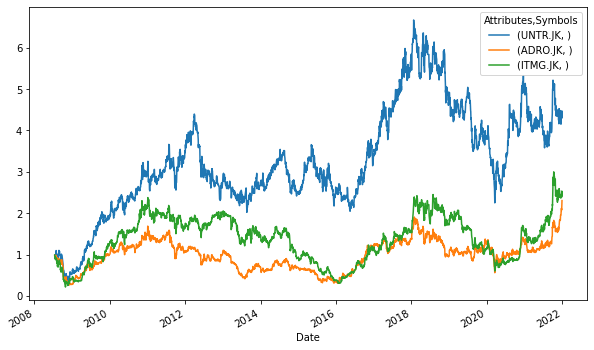

In [2]:
n = 1
start_date = (datetime.today() - timedelta(weeks=52*n)).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'ITMG.JK']

port = mod.stockrets(stocks, start_date, end_date)
port.cumsum().apply(np.exp).plot(figsize=(10,6))

In [22]:
start_date = "2012-01-01"
end_date = "2022-12-31"
rf = 0.06
stocks = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'NVDA']

port = mod.stockrets(stocks, start_date, end_date)
weight = mod.weight_opt(port, rf, max_allocation=0.3)
port_optimized = mod.port_opt(port, weight)
port_optimized

Attributes,FB,AMZN,AAPL,NFLX,GOOG,NVDA,Optimized
Symbols,,,,,,,
Date,,,,,,,
2021-07-26,0.007194,0.011739,0.002890,0.002093,0.013180,-0.013590,0.001918
2021-07-27,-0.012563,-0.020046,-0.015012,0.004674,-0.020606,-0.004467,-0.014030
2021-07-28,0.014762,0.001083,-0.012271,0.000751,-0.003038,0.015241,0.000088
2021-07-29,-0.040902,-0.008409,0.004542,-0.009772,0.001165,0.008120,0.003307
2021-07-30,-0.005653,-0.078663,0.001509,0.006435,-0.009711,-0.008325,-0.012824
...,...,...,...,...,...,...,...
2022-07-18,0.015244,0.001848,-0.020859,0.009526,-0.025662,0.021279,-0.007388
2022-07-19,0.049863,0.038372,0.026371,0.054580,0.041960,0.053861,0.040495


In [23]:
mod.performance(port_optimized)

Attributes,FB,AMZN,AAPL,NFLX,GOOG,NVDA,Optimized
Symbols,,,,,,,
Mean Return,-0.7846,-0.4027,0.0424,-0.8527,-0.2414,-0.1214,-0.1364
St. Dev.,0.5469,0.4242,0.2997,0.6743,0.3193,0.5849,0.3617
RR Ratio,-1.4345,-0.9494,0.1415,-1.2647,-0.7561,-0.2075,-0.3771
% Positive,0.4940,0.4900,0.5219,0.4821,0.5259,0.4940,0.5179
Worst Day,-0.3064,-0.1514,-0.0581,-0.4326,-0.0598,-0.0969,-0.0625
Best Day,0.1621,0.1269,0.0675,0.1055,0.0711,0.1137,0.0509
Max DrawDown,nan,nan,nan,nan,nan,nan,nan


In [24]:
weight

Attributes  Symbols
FB                     0.0
AMZN                   0.1
AAPL                   0.3
NFLX                   0.0
GOOG                   0.3
NVDA                   0.3
dtype: float64

<AxesSubplot:xlabel='Date'>

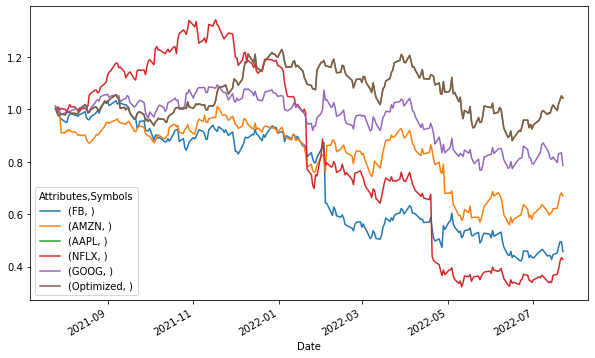

In [20]:
port_optimized.cumsum().apply(np.exp).plot(figsize=(10,6))

In [21]:
start_date = "2010-01-01"
end_date = "2015-12-31"
rf = 0.06
stocks = ['UNTR.JK', 'BBCA.JK', 'SIDO.JK', 'ASII.JK', 'TLKM.JK']

port1 = mod.stockrets(stocks, start_date, end_date)
weight1 = mod.weight_opt(port1, rf)
port_optimized1 = mod.port_opt(port1, weight1)
perf1 = mod.performance(port_optimized1)
perf1

Attributes,UNTR.JK,BBCA.JK,SIDO.JK,ASII.JK,TLKM.JK,Optimized
Symbols,,,,,,
Mean Return,0.0111,0.1849,-0.0842,0.0112,0.2356,0.2226
St. Dev.,0.3723,0.2442,0.2994,0.3331,0.2392,0.2137
RR Ratio,0.0299,0.7573,-0.2814,0.0335,0.9850,1.0415
% Positive,0.4747,0.4909,0.3455,0.4586,0.5051,0.5475
Worst Day,-0.0841,-0.0607,-0.0556,-0.0897,-0.0599,-0.0490
Best Day,0.0986,0.0683,0.0780,0.1068,0.0558,0.0535
Max DrawDown,-0.5206,-0.2965,-0.5516,-0.4822,-0.1329,-0.1590


In [22]:
weight1

Attributes  Symbols
UNTR.JK                0.0000
BBCA.JK                0.2576
SIDO.JK                0.0000
ASII.JK                0.0000
TLKM.JK                0.7424
dtype: float64

In [38]:
start_date = "2021-01-01"
end_date = "2021-12-31"
rf = 0.06
stocks = ['SRTG.JK', 'ADRO.JK', 'ARTO.JK', 'BBYB.JK', 'MDKA.JK', 'AGRO.JK']

port2 = mod.stockrets(stocks, start_date, end_date)
weight2 = mod.weight_opt(port2, rf)
port_optimized2 = mod.port_opt(port2, weight2)
perf2 = mod.performance(port_optimized2)
perf2

Attributes,SRTG.JK,ADRO.JK,ARTO.JK,BBYB.JK,MDKA.JK,AGRO.JK,Optimized
Symbols,,,,,,,
Mean Return,1.4374,0.5760,1.5521,2.2720,0.4167,0.5875,1.4014
St. Dev.,0.5527,0.4172,0.5851,1.0482,0.4952,0.7734,0.3403
RR Ratio,2.6009,1.3807,2.6528,2.1674,0.8414,0.7597,4.1187
% Positive,0.4756,0.4553,0.5081,0.4106,0.4268,0.4268,0.5650
Worst Day,-0.0709,-0.0723,-0.0716,-0.0726,-0.0706,-0.0726,-0.0552
Best Day,0.2231,0.1418,0.2231,0.2231,0.1330,0.1867,0.0915
Max DrawDown,-0.0792,-0.0182,-0.1799,-0.0626,-0.0695,-0.4540,-0.0191


In [39]:
weight2

Attributes  Symbols
SRTG.JK                0.3012
ADRO.JK                0.2330
ARTO.JK                0.3109
BBYB.JK                0.1548
MDKA.JK                0.0000
AGRO.JK                0.0000
dtype: float64

<AxesSubplot:xlabel='Date'>

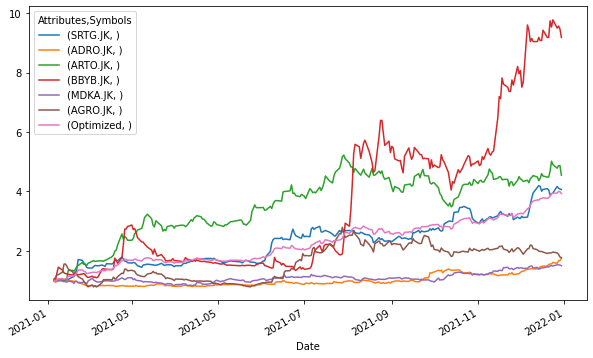

In [40]:
port_optimized2.cumsum().apply(np.exp).plot(figsize=(10,6))

In [44]:
pdr.get_data_yahoo("ADRO.JK",'2022-01-14')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-14,2330,2250,2300,2270,173258000,2270


In [2]:
start_date = '2015-01-01'
end_date = '2020-12-31'
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
          'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
          'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
          'TOWR.JK']

port1 = mod.stockrets(['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
                      'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
                      'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
                      'TOWR.JK'], start_date, end_date)
port_w1 = mod.weight_opt(port1, rf)
port_opt1 = mod.port_opt(port1, port_w1)
perf1 = mod.performance(port_opt1)

In [3]:
mean1 = port_opt1["Optimized"].mean()
mean1

0.0004914640092498223

In [4]:
start_date = '2011-01-01'
end_date = '2020-12-31'
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
          'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
          'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
          'TOWR.JK']

port2 = mod.stockrets(['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
                      'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
                      'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
                      'TOWR.JK'], start_date, end_date)
port_w2 = mod.weight_opt(port2, rf)
port_opt2 = mod.port_opt(port2, port_w2)
perf2 = mod.performance(port_opt2)

In [5]:
mean2 = port_opt2["Optimized"].mean()
mean2

0.0006468063356510219

In [6]:
start_date = '2021-01-01'
end_date = '2022-12-31'
rf = 0.06
stocks = ['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
          'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
          'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
          'TOWR.JK']

port3 = mod.stockrets(['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
                      'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
                      'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
                      'TOWR.JK'], start_date, end_date)
port_opt_t1 = mod.port_opt(port3, port_w1)

In [7]:
nx = (port_opt_t1['Optimized']-mean1)**2
n = nx.shape[0]
sd_t1 = np.sqrt(nx.sum()/n)
sd_t1

0.01096986912273449

In [8]:
port4 = mod.stockrets(['BBCA.JK', 'BBRI.JK', 'BBNI.JK', 'BMRI.JK',
                      'BBTN.JK', 'CPIN.JK', 'ERAA.JK', 'EXCL.JK',
                      'ICBP.JK', 'JPFA.JK', 'TBIG.JK', 'TLKM.JK',
                      'TOWR.JK'], start_date, end_date)
port_opt_t2 = mod.port_opt(port4, port_w2)
nx1 = (port_opt_t2['Optimized']-mean2)**2
n1 = nx1.shape[0]
sd_t2 = np.sqrt(nx1.sum()/n1)
sd_t2

0.011637410789296462

<AxesSubplot:xlabel='Date'>

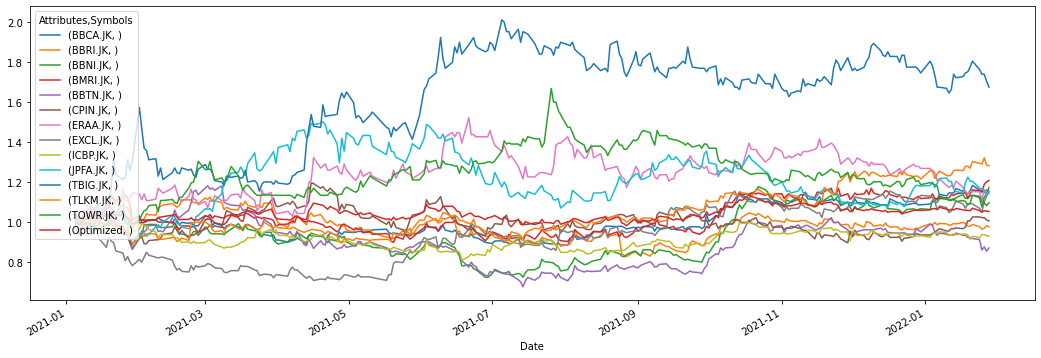

In [23]:
mod.port_plot(port_opt_t1)

SyntaxError: invalid syntax (<ipython-input-22-673a06d89f02>, line 1)

<AxesSubplot:xlabel='Date'>

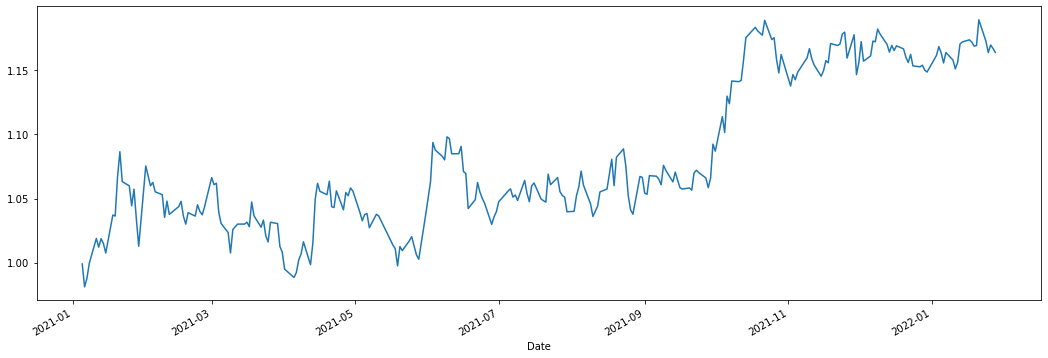

In [16]:
mod.port_plot(port_opt_t2['Optimized'])